In [1]:
import pandas as pd
import numpy as np
import time
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_column',50)

# Sommaire

## <a href="#1"> Customers
    
## <a href="#2"> Geolocalisation

## <a href="#3"> Orders
    
## <a href="#4"> Items
    
## <a href="#5"> Payments
    
## <a href="#6"> Reviews
    
## <a href="#7"> Products
    
## <a href="#8"> Sellers
    
## <a href="#9"> Category
    
## <a href="#10"> RFM

## <a name="1"> Customers

In [3]:
df_customers = pd.read_csv('olist_customers_dataset.csv')

In [4]:
df_customers.shape

(99441, 5)

In [5]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


df_customers donne des informations sur le client et son emplacement

**customer_id** est le numéro client pour une commande

**customer_unique_id** est l'identifiant unique du client

**customer_zip_code_prefix** donne les 5  premiers chiffres du code postal du client

**customer_city** est la ville du client

**customer_state** est l'Etat de résidence du client

In [6]:
# Vérifions que chaque customer_unique_id n'a pas 2 customer_id identiques

df_customers[(df_customers.duplicated(subset = 'customer_unique_id') == True) \
             & (df_customers.duplicated(subset = 'customer_id') == True)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [7]:
df_customers.isna().mean()

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

In [8]:
len(df_customers['customer_unique_id'].unique())

96096

Il y a 96 096 clients différents

In [9]:
df_customers['customer_city'].value_counts()

customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64

Les acheteurs viennent de 4 119 villes différentes. Ville principale : Sao Paulo avec 15 540 clients.

In [10]:
df_customers['customer_state'].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

Les clients viennent de 27 états différents

## <a name="2"> Geolocalisation

In [11]:
df_geolocalisation = pd.read_csv('olist_geolocation_dataset.csv')

In [12]:
df_geolocalisation.shape

(1000163, 5)

In [13]:
df_geolocalisation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


df_geolocalisation donne des informations sur les codes postaux et leurs coordonnées

**geolocation_zip_code_prefix** donne les 5 premiers chiffres du code postal

**geolocation_lat** donne la latitude

**geolocation_lng** donne la longitude

**geolocation_city** indique la ville

**geolocation_state** donne l'Etat

In [14]:
df_geolocalisation.isna().mean()

geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

In [15]:
# Vérifions les doublons selon le code postal

df_geolocalisation.duplicated(subset = 'geolocation_zip_code_prefix').sum()

981148

In [16]:
# Les codes postaux peuvent avoir plusieurs coordonnées différentes.
# Créons un dataframe en ne gardant que le premier code postal

df_geolocalisation2 = df_geolocalisation.drop_duplicates(
    subset = 'geolocation_zip_code_prefix',keep = 'first')

In [17]:
df_geolocalisation2

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
...,...,...,...,...,...
999774,99955,-28.107588,-52.144019,vila langaro,RS
999780,99970,-28.345143,-51.876926,ciriaco,RS
999786,99910,-27.863500,-52.084760,floriano peixoto,RS
999803,99920,-27.858716,-52.300403,erebango,RS


In [18]:
# Je renomme 'geolocation_zip_code_prefix' en 'customer_zip_code_prefix'

df_geolocalisation2 = df_geolocalisation2.rename({
    'geolocation_zip_code_prefix' :'customer_zip_code_prefix'}, axis='columns')

In [19]:
# Je supprime 'geolocation_city' et 'geolocation_state' (déjà présents dans df_customers)

df_geolocalisation2.drop(
    columns = ['geolocation_city','geolocation_state'], inplace = True)

In [20]:
# Je fusionne les informations de df_customers et de df_geolocalisation2

data = pd.merge(df_customers, df_geolocalisation2,
                on = 'customer_zip_code_prefix')

## <a name="3"> Orders

In [21]:
df_orders = pd.read_csv('olist_orders_dataset.csv')

In [22]:
df_orders.shape

(99441, 8)

In [23]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


df_orders donne des informations sur la livraison

**order_id** est le numéro de commande

**customer_id** est l'identifiant client pour la commande

**order_status** est le statut de la commande (livré, expédié...)

**order_purchase_timestamp** donne la date et l'heure de l'achat

**order_approved_at** donne la date et l'heure de l'approbation du paiement

**order_delivered_carrier_date** donne la date et l'heure de la validation de la commande

**order_delivered_customer_date** donne la date et l'heure réelles de la livraison 

**order_estimated_delivery_date** donne la date et l'heure prévues de la livraison 

In [24]:
# Vérifions qu'il n'y a pas de numéros de commande identiques

df_orders.duplicated(subset = 'order_id').sum()

0

In [25]:
# vérifions qu'un identifiant client n'a pas été utilisé plusieurs fois

df_orders.duplicated(subset = 'customer_id').sum()

0

In [26]:
df_orders.isna().mean()

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001609
order_delivered_carrier_date     0.017930
order_delivered_customer_date    0.029817
order_estimated_delivery_date    0.000000
dtype: float64

In [27]:
df_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [28]:
df_orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Sur les 99 441 commandes, 96 478 ont bien été livrées

In [29]:
# Créons un dataframe réduit

df_orders2 = df_orders.drop(['order_purchase_timestamp',
                             'order_approved_at',
                             'order_delivered_carrier_date'],axis=1)

In [30]:
# Je ne garde que les commandes livrées puis supprime 'order_status'

df_orders2 = df_orders2.loc[df_orders2['order_status'] == 'delivered']
df_orders2 = df_orders2.drop('order_status', axis = 1)

In [31]:
# Transformons les features en un objet datetime

df_orders2['order_delivered_customer_date'] = \
pd.to_datetime(df_orders2['order_delivered_customer_date'])
df_orders2['order_estimated_delivery_date'] = \
pd.to_datetime(df_orders2['order_estimated_delivery_date'])
df_orders2.dtypes

order_id                                 object
customer_id                              object
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [32]:
# Calculons le retard de livraison, si le résultat est négatif, c'est que la commande est arrivée en avance

df_orders2['days_late'] = df_orders2['order_delivered_customer_date'] - \
df_orders2['order_estimated_delivery_date']

In [33]:
# Transformons cette différence en un nombre entier de jours

def extract_days(duration):
    return duration.days

df_orders2['days_late'] = df_orders2['days_late'].apply(extract_days)

In [34]:
df_orders2.describe()

,order_delivered_customer_date,order_estimated_delivery_date,days_late
count,96470,96478,96470.000000
mean,2018-01-14 12:41:33.581683456,2018-01-25 17:09:52.325711616,-11.875889
min,2016-10-11 13:46:32,2016-10-04 00:00:00,-147.000000
25%,2017-09-25 22:15:09.500000,2017-10-05 00:00:00,-17.000000
50%,2018-02-02 19:32:21,2018-02-16 00:00:00,-12.000000
75%,2018-05-15 22:54:48.500000,2018-05-28 00:00:00,-7.000000
max,2018-10-17 13:22:46,2018-10-25 00:00:00,188.000000
std,NaN,NaN,10.182105


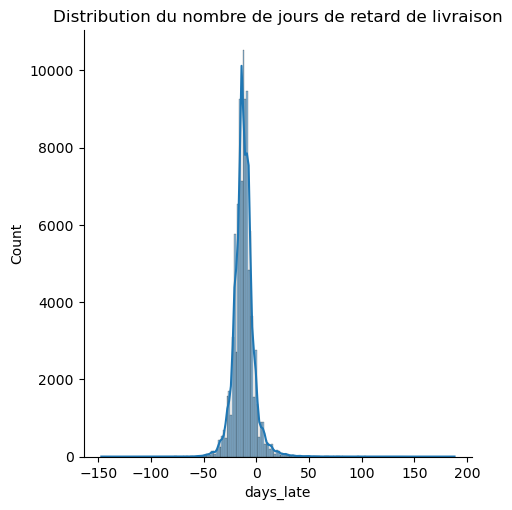

In [35]:
sns.displot(df_orders2['days_late'], kde = True, bins = 200)
plt.title('Distribution du nombre de jours de retard de livraison')
plt.show()

La majorité des commandes arrive à l'heure ou en avance.

In [36]:
df_orders2.loc[df_orders2['days_late'] > 0]

,order_id,customer_id,order_delivered_customer_date,order_estimated_delivery_date,days_late
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,2017-10-09 22:23:46,2017-09-28,11.0
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,2018-03-21 22:03:54,2018-03-12,9.0
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,2017-12-28 18:59:23,2017-12-21,7.0
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,2018-04-03 13:28:46,2018-04-02,1.0
58,a685d016c8a26f71a0bb67821070e398,911e4c37f5cafe1604fe6767034bf1ae,2017-04-06 13:37:16,2017-03-30,7.0
...,...,...,...,...,...
99396,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,2018-08-21 00:03:26,2018-08-16,5.0
99397,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,2018-04-05 19:59:49,2018-04-02,3.0
99423,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,2017-11-21 17:06:59,2017-10-31,21.0
99425,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,2018-04-11 00:48:31,2018-04-09,2.0


6 534 commandes sont arrivées en retard

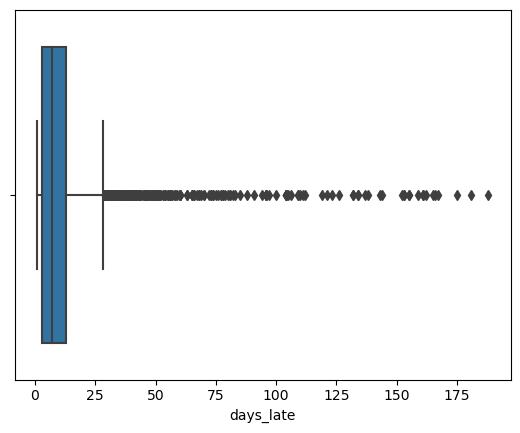

In [37]:
sns.boxplot(x = df_orders2.loc[df_orders2['days_late'] > 0, 'days_late'])
plt.show()

Certaines commandes ont beaucoup de jours de retard. Il faut regarger de plus près.

In [38]:
df_orders2.loc[df_orders2['days_late'] > 30]

,order_id,customer_id,order_delivered_customer_date,order_estimated_delivery_date,days_late
110,9d531c565e28c3e0d756192f84d8731f,d4faa220408c20e53595d2950f361f3b,2018-01-23 21:38:52,2017-12-22,32.0
115,8fc207e94fa91a7649c5a5dab690272a,c69f8b33e62ecb30ff78ae46d7fb9241,2018-01-20 13:42:22,2017-12-19,32.0
252,f31535f21d145b2345e2bf7f09d62322,ed532487db04478dfba09d112649fc13,2018-04-23 15:49:34,2018-03-05,49.0
445,690199d6a2c51ff57c6b392d7680cbfd,19bacb562bd43bd4eaf05b6c0a59dad0,2018-05-14 12:28:56,2018-04-11,33.0
658,cafc9b2f7d35ec42bdb74347cc6e8a70,c9573cc1e246dadca50b2a74f795def3,2018-04-04 17:12:36,2018-02-16,47.0
...,...,...,...,...,...
97899,443038d9ed6b74bc4f7bfa679ce81bf1,f9efa1e08ec36a3bd42cdeb68995af0b,2018-05-07 22:31:53,2018-04-05,32.0
97961,16efc11ccab2e8a17656020f80cd39e3,0a564cb06b5914890ac8f1664ece017e,2018-02-05 21:08:10,2017-12-27,40.0
98227,2e56f943f231f5fe108f43fb370b0ed6,66b9bc2d53ea09b027966337424fa0c7,2017-05-25 07:14:44,2017-03-16,70.0
98721,63fd40b25ac9dbeea8ec6b26558a1add,23e74e2cca6193a0e238483464222068,2018-04-20 23:08:27,2018-03-09,42.0


345 commandes dépassent les 30 jours de retard

In [39]:
df_orders2['order_delivered_customer_date'].max()

Timestamp('2018-10-17 13:22:46')

In [40]:
df_orders2['order_delivered_customer_date'].min()

Timestamp('2016-10-11 13:46:32')

Les commandes vont du 11/10/2016 au 17/10/2018

In [41]:
# Calculons la récence en jours

max_date = df_orders2['order_delivered_customer_date'].max()
df_orders2['recency'] = \
(max_date - df_orders2['order_delivered_customer_date']).dt.days

In [42]:
# Regardons si la colonne 'recency' est complète

df_orders2.loc[df_orders2['recency'].isna()]

,order_id,customer_id,order_delivered_customer_date,order_estimated_delivery_date,days_late,recency
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,NaT,2017-12-18,NaN,NaN
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,NaT,2018-07-16,NaN,NaN
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,NaT,2018-07-30,NaN,NaN
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,NaT,2018-07-30,NaN,NaN
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,NaT,2018-07-24,NaN,NaN
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,NaT,2017-06-23,NaN,NaN
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,NaT,2018-06-26,NaN,NaN
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,NaT,2018-07-19,NaN,NaN


In [43]:
# Je supprime les commandes qui n'ont pas ces informations

df_orders2 = df_orders2.loc[~df_orders2['recency'].isna()]

In [44]:
# Je supprime 'order_estimated_delivery_date'

df_orders2 = df_orders2.drop('order_estimated_delivery_date', axis = 1)

In [45]:
df_orders2

,order_id,customer_id,order_delivered_customer_date,days_late,recency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13,-8.0,371.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-08-07 15:27:45,-6.0,70.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-17 18:06:29,-18.0,60.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-12-02 00:28:42,-13.0,319.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-16 18:17:02,-10.0,242.0
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-17 15:08:01,-11.0,578.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-28 17:37:56,-2.0,230.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-09-21 11:24:17,-6.0,391.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-25 23:32:54,-21.0,264.0


In [46]:
# J'ajoute les informations de df_orders2

data = pd.merge(data, df_orders2, on = 'customer_id')

## <a name="4"> Items

In [47]:
df_items = pd.read_csv('olist_order_items_dataset.csv')

In [48]:
df_items.shape

(112650, 7)

In [49]:
df_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


df_items donne des informations sur les articles composant une commande

**order_id** est le numéro de commande

**order_item_id** est le numéro séquentiel de l'article dans la commande 

**product_id** est l'identifiant de l'article

**seller_id** est l'identifiant du vendeur

**shipping_limit_date** est la date limite d'expédition du vendeur

**price** est le prix de l'article

**freight_value** représente les frais de port par article (si une commande comporte plus d'un article, la valeur est répartie entre tous les articles)

In [50]:
df_items.isna().mean()

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [51]:
df_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Le prix moyen d'un article est de 120 et le prix médian de 75 R$

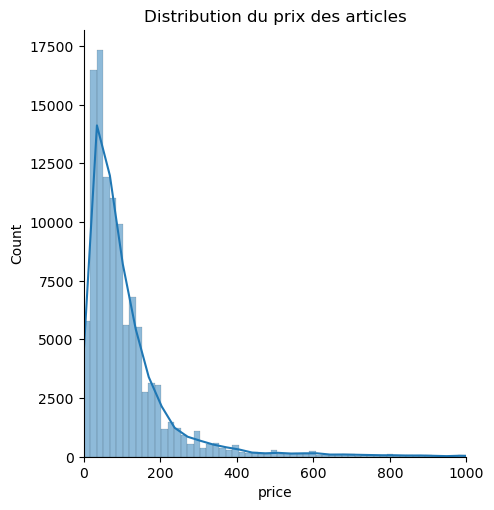

In [52]:
sns.displot(df_items['price'], kde = True, bins = 400)
plt.xlim(left = 0, right = 1000)
plt.title('Distribution du prix des articles')
plt.show()

<Axes: xlabel='price'>

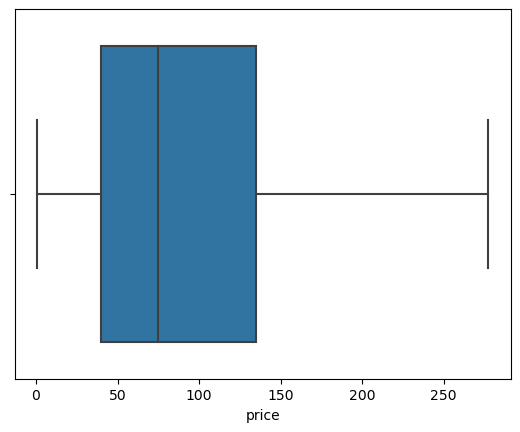

In [53]:
sns.boxplot(x = df_items['price'], showfliers = False)

Plus de 75% des articles coûtent moins de 150 R$

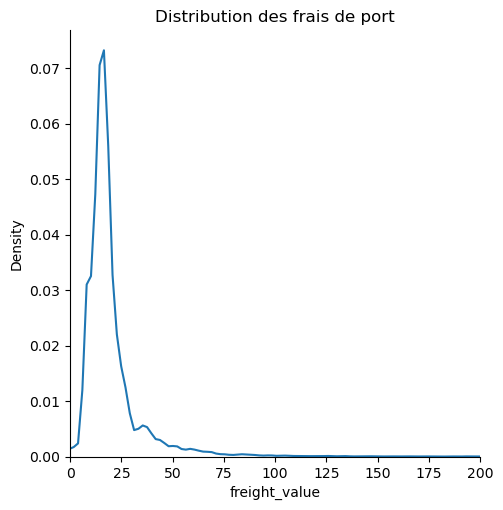

In [54]:
sns.displot(df_items['freight_value'], kind='kde')
plt.xlim(left = 0, right = 200)
plt.title('Distribution des frais de port')
plt.show()

Text(0.5, 1.0, 'Frais de port')

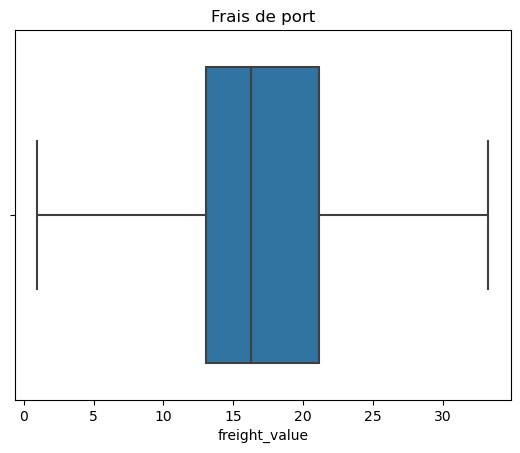

In [55]:
sns.boxplot(x = df_items['freight_value'], showfliers = False)
plt.title('Frais de port')

Les frais de port sont majoritairement compris entre 13 et 21 R$.

In [56]:
# Créons un dataframe réduit

df_items2 = df_items.drop(['seller_id','shipping_limit_date'],axis=1)

In [57]:
# Regroupons tous les articles d'une même commande

df_items2 = df_items2.groupby(['order_id']).agg({
    'order_item_id': 'max',
    'price': 'sum',
    'freight_value': 'sum'
})
df_items2.reset_index(inplace=True)

In [58]:
# Je renomme 'order_item_id'

df_items2.rename({'order_item_id': 'number_of_items'},
                 inplace = True, axis = 1)

In [59]:
df_items2

,order_id,number_of_items,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14
...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1,299.99,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,1,350.00,36.53
98663,fffce4705a9662cd70adb13d4a31832d,1,99.90,16.95
98664,fffe18544ffabc95dfada21779c9644f,1,55.99,8.72


In [60]:
# J'ajoute les informations de df_items2

data = pd.merge(data, df_items2, on = 'order_id')

## <a name="5"> Payments

In [61]:
df_payments = pd.read_csv('olist_order_payments_dataset.csv')

In [62]:
df_payments.shape

(103886, 5)

In [63]:
df_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


df_payments donne des informations sur les options de paiement

**order_id** est l'identifiant d'une commande

**payment_sequential** est le numéro séquentiel du paiement lorsqu'on utilise plus d'un moyen de paiement

**payment_type** est le mode de paiement

**payment_installments** est le nombre de versements d'un paiement

**payment_value** est le montant du paiement séquentiel

In [64]:
df_payments.isna().mean()

order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

In [65]:
df_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Le paiement médian est de 100 et le paiement moyen de 154 R$

In [66]:
# Je regroupe les paiements par commande

df_payments2 = df_payments.groupby(['order_id']).agg({
    'payment_sequential': 'max',
    'payment_type': lambda x: ' '.join(x),
    'payment_installments': 'sum',
    'payment_value': 'sum'
})
df_payments2.reset_index(inplace = True)

In [67]:
df_payments2.rename({'payment_sequential': 'number_of_payment_types'},
                    inplace = True, axis = 1)

df_payments2

,order_id,number_of_payment_types,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04
...,...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,1,boleto,1,386.53
99437,fffce4705a9662cd70adb13d4a31832d,1,credit_card,3,116.85
99438,fffe18544ffabc95dfada21779c9644f,1,credit_card,3,64.71


In [68]:
# J'ajoute les informations de df_payments2

data = pd.merge(data, df_payments2, on = 'order_id')

## <a name="6"> Reviews

In [69]:
df_reviews = pd.read_csv('olist_order_reviews_dataset.csv')

In [70]:
df_reviews.shape

(99224, 7)

In [71]:
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


df_reviews donne les avis des clients

**review_id** est l'identifiant de l'avis

**order_id** est le numéro de commande

**review_score** est une note allant de 1 à 5

**review_comment_title** est le titre de l'avis du client

**review_comment_message** est le commentaire du client

**review_creation_date** est la date d'envoi de l'enquête de satisfaction au client

**review_answer_timestamp** donne la date et l'heure de la réponse du client

In [72]:
df_reviews.isna().mean()

review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title       0.883415
review_comment_message     0.587025
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64

In [73]:
df_reviews.duplicated(subset = 'review_id').sum()

814

In [74]:
df_reviews.duplicated(subset = 'order_id').sum()

551

In [75]:
df_reviews[df_reviews.duplicated(subset = 'order_id') == True]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08
...,...,...,...,...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,NaN,NaN,2018-02-17 00:00:00,2018-02-19 19:29:19
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,NaN,NaN,2017-05-24 00:00:00,2017-05-24 23:15:21


In [76]:
df_reviews.loc[df_reviews['order_id'] == '5040757d4e06a4be96d3827b860b4e7c']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1028,afd9b3d196f0acd81d79d8ccd79c2430,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-10-31 00:00:00,2017-11-04 21:12:29
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48


Certaines commandes ont plusieurs avis différents

In [77]:
df_reviews[df_reviews.duplicated(subset = 'review_id') == True]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3317,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37
5719,308316408775d1600dad81bd3184556d,3fe4dbcdb046a475dbf25463c1ca78bd,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09
7213,8ee90ac383cf825bb7f4756130d4e74a,75d5d3d16567a27eefc5752aeb063072,5,NaN,recomendo,2017-05-30 00:00:00,2017-06-02 18:16:17
7805,d433c252647c51309432ca0b763f969b,191abde9c3bf77d1ce67d100d8db6d15,1,NaN,NaN,2017-09-03 00:00:00,2017-09-06 16:11:00
9013,03a6a25db577d0689440933055111897,3fde8b7313af6b37b84b5c7594d7add0,5,NaN,Muito Bom! Gostei Bastante! Tecido Ótimo! Aten...,2017-12-15 00:00:00,2017-12-16 01:32:18
...,...,...,...,...,...,...,...
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99124,6ec93e77f444e0b1703740a69122e35d,e1fdc6e9d1ca132377e862593a7c0bd4,5,NaN,Vendedor compromisso do vou o cliente,2017-10-07 00:00:00,2017-10-07 19:47:11
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99167,017808d29fd1f942d97e50184dfb4c13,b1461c8882153b5fe68307c46a506e39,5,NaN,NaN,2018-03-02 00:00:00,2018-03-05 01:43:30


In [78]:
df_reviews.loc[df_reviews['review_id'] == '3242cc306a9218d0377831e175d62fbf']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1009,3242cc306a9218d0377831e175d62fbf,711246846695fa895c1776f0ddc30b20,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37
3317,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37


Cet avis concerne 2 commandes différentes

In [79]:
# Création d'un df réduit

df_reviews2 = df_reviews.drop(
    ['review_id','review_comment_title','review_comment_message',
     'review_creation_date','review_answer_timestamp'], axis = 1)
df_reviews2

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5
...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,5
99220,22ec9f0669f784db00fa86d035cf8602,5
99221,55d4004744368f5571d1f590031933e4,5
99222,7725825d039fc1f0ceb7635e3f7d9206,4


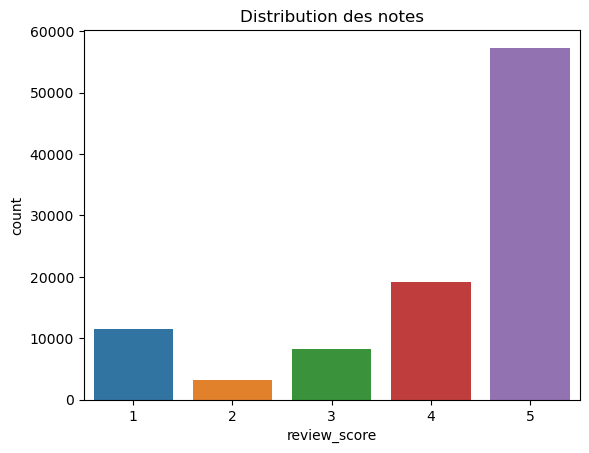

In [80]:
sns.countplot(data = df_reviews2, x = 'review_score')
plt.title('Distribution des notes')
plt.show()

In [81]:
df_reviews2['review_score'].describe()

count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

In [82]:
df_reviews2['review_score'].value_counts(normalize = True)

review_score
5    0.577763
4    0.192917
1    0.115133
3    0.082430
2    0.031756
Name: proportion, dtype: float64

La grande majorité des clients sont satisfaits. Moins de 23% des clients ont mis une note comprise entre 1 et 3.

In [83]:
# J'ajoute les informations de df_reviews

data = pd.merge(data, df_reviews2, on = 'order_id')

## <a name="7"> Products

In [84]:
df_products = pd.read_csv('olist_products_dataset.csv')

In [85]:
df_products.shape

(32951, 9)

In [86]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


df_products donne des informations sur les produits

**product_id** est l'identifiant unique d'un produit

**product_category_name** est la catégorie d'un produit

**product_name_lenght** est le nombre de caractères du nom du produit

**product_description_lenght** est le nombre de caractères de la desciption du produit

**product_photos_qty** est le nombre de photos du produit

**product_weight_g** est le poids du produit en grammes

**product_length_cm** est la longueur du produit en centimètres

**product_height_cm** est la hauteur du produit en cm

**product_width_cm** est la largeur du produit en cm

In [87]:
df_products.isna().mean()

product_id                    0.000000
product_category_name         0.018512
product_name_lenght           0.018512
product_description_lenght    0.018512
product_photos_qty            0.018512
product_weight_g              0.000061
product_length_cm             0.000061
product_height_cm             0.000061
product_width_cm              0.000061
dtype: float64

## <a name="8"> Sellers

In [88]:
df_sellers = pd.read_csv('olist_sellers_dataset.csv')

In [89]:
df_sellers.shape

(3095, 4)

In [90]:
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


df_sellers donne des informations sur les vendeurs

**seller_id** est l'identifiant unique du vendeur

**seller_zip_code_prefix** donne les 5 premiers chiffres du code postal

**seller_city** est la ville

**seller_state** est l'Etat

In [91]:
df_sellers.isna().mean()

seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64

## <a name="9"> Category 

In [92]:
df_category = pd.read_csv('product_category_name_translation.csv')

In [93]:
df_category.shape

(71, 2)

In [94]:
df_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


df_category donne la catégorie du produit en anglais

**product_category_name** est la catégorie en portugais

**product_category_name_english** est la catégorie en anglais

In [95]:
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_delivered_customer_date,days_late,recency,number_of_items,price,freight_value,number_of_payment_types,payment_type,payment_installments,payment_value,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,2017-05-25 10:35:35,-11.0,510.0,1,124.99,21.88,1,credit_card,2,146.87,4
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.509897,-47.397866,95261f608a64bbbe760a212b4d48a4ee,2018-06-21 12:18:32,-14.0,118.0,1,79.90,14.87,1,credit_card,8,94.77,5
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.509897,-47.397866,9444fa2ab50a3f5af63b48be297eda24,2017-09-18 20:21:42,-14.0,393.0,1,44.90,17.60,1,credit_card,1,62.50,5
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.509897,-47.397866,dceb8e88274c6f42a88a76ed979eb817,2018-03-28 19:27:01,-15.0,202.0,1,19.90,12.79,1,credit_card,3,32.69,5
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.509897,-47.397866,6ee1cea1b2edcc713f83ebfbccbc57f9,2018-08-03 16:48:40,-6.0,74.0,1,63.90,13.11,1,credit_card,1,77.01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96081,0b7a30ba373aeb55cf28add5b5477956,8c8173e547e020f411aa55b2fceed861,87145,paicandu,PR,-23.501992,-52.150755,e12f5458c6b4f349a97fbf22e08d17ac,2017-08-15 13:54:33,-8.0,427.0,1,59.90,17.67,1,boleto,1,77.57,5
96082,ff6b440b2465bfaef05c675efb48cd15,e38a27b979a552e019e297ecc22dc67b,98860,eugenio de castro,RS,-28.525792,-54.145061,82a11e82ea02c7e3381366e935c1126e,2018-06-06 16:18:51,-1.0,132.0,1,97.00,14.76,1,boleto,1,111.76,5
96083,3f7029d9b98a47370cd5f3a97adcbccd,5894d202cc869b4ec460fce3c6ed8cb5,5538,sao paulo,SP,-23.588504,-46.737870,6e9f8d6156d8c37f0e0e6351908de639,2018-04-10 13:40:54,-6.0,189.0,1,61.80,13.79,1,credit_card,3,75.59,5
96084,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.823261,-49.247368,e65fa5f31ce4436d38bcf5e109fd43e4,2018-02-20 17:48:37,1.0,238.0,1,120.00,39.77,1,credit_card,3,159.77,5


In [96]:
data['frequency'] = data['order_delivered_customer_date']

In [97]:
# Je regroupe les informations par client

data = data.groupby('customer_unique_id').agg({
    'customer_zip_code_prefix': 'first',
    'customer_city': 'first',
    'customer_state': 'first',
    'geolocation_lat': 'first',
    'geolocation_lng': 'first',
    'frequency': 'count',
    'days_late': 'mean',
    'recency': 'min',
    'number_of_items': 'sum',
    'price': 'sum',
    'freight_value': 'sum',
    'payment_installments': 'sum',
    'payment_value': 'sum',
    'review_score': 'mean'
})
data

,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,frequency,days_late,recency,number_of_items,price,freight_value,payment_installments,payment_value,review_score
customer_unique_id,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,-23.335331,-46.828647,1,-5.0,153.0,1,129.90,12.00,8,141.90,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,-23.567395,-46.792957,1,-5.0,159.0,1,18.90,8.29,1,27.19,4.0
0000f46a3911fa3c0805444483337064,88115,sao jose,SC,-27.543787,-48.625680,1,-2.0,559.0,1,69.00,17.22,8,86.22,3.0
0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,-1.311011,-48.482884,1,-12.0,349.0,1,25.99,17.63,4,43.62,4.0
0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,-23.504368,-47.466156,1,-8.0,323.0,1,180.00,16.89,6,196.89,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,-8.363166,-36.559088,1,-27.0,468.0,2,1570.00,497.42,10,2067.42,5.0
fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,-12.221792,-38.962517,1,-3.0,280.0,1,64.89,19.69,1,84.58,4.0
ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,-11.829317,-55.496443,1,-30.0,602.0,1,89.90,22.56,1,112.46,5.0


In [98]:
data.rename({'payment_value': 'monetary'}, inplace = True, axis = 1)
data

,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,frequency,days_late,recency,number_of_items,price,freight_value,payment_installments,monetary,review_score
customer_unique_id,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,-23.335331,-46.828647,1,-5.0,153.0,1,129.90,12.00,8,141.90,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,-23.567395,-46.792957,1,-5.0,159.0,1,18.90,8.29,1,27.19,4.0
0000f46a3911fa3c0805444483337064,88115,sao jose,SC,-27.543787,-48.625680,1,-2.0,559.0,1,69.00,17.22,8,86.22,3.0
0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,-1.311011,-48.482884,1,-12.0,349.0,1,25.99,17.63,4,43.62,4.0
0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,-23.504368,-47.466156,1,-8.0,323.0,1,180.00,16.89,6,196.89,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,-8.363166,-36.559088,1,-27.0,468.0,2,1570.00,497.42,10,2067.42,5.0
fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,-12.221792,-38.962517,1,-3.0,280.0,1,64.89,19.69,1,84.58,4.0
ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,-11.829317,-55.496443,1,-30.0,602.0,1,89.90,22.56,1,112.46,5.0


In [99]:
data['payment_installments'].describe()

count    92493.000000
mean         3.095110
std          3.041007
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         68.000000
Name: payment_installments, dtype: float64

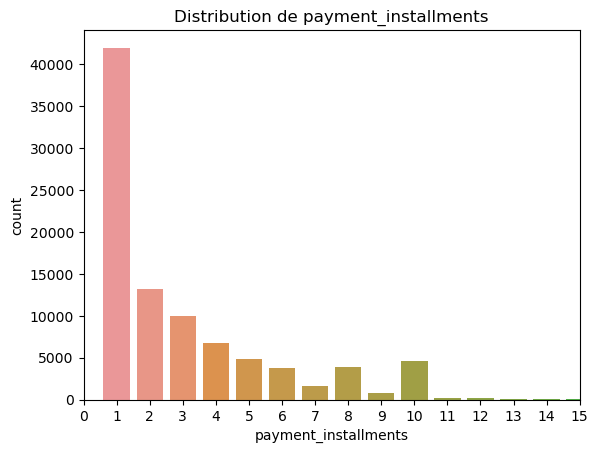

In [100]:
sns.countplot(data = data, x = 'payment_installments')
plt.xlim(0,15)
plt.title('Distribution de payment_installments')
plt.show()

Text(0.5, 1.0, 'Etalement des paiements')

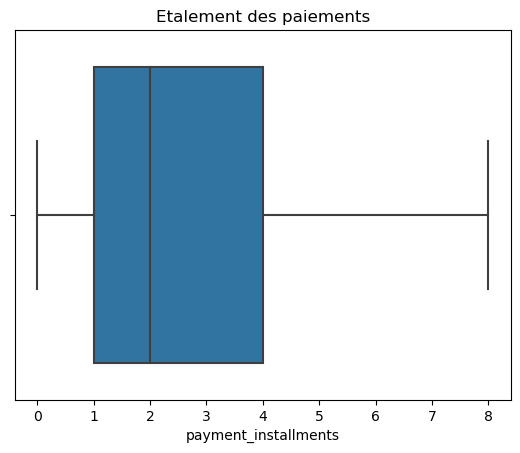

In [101]:
sns.boxplot(x = data['payment_installments'], showfliers = False)
plt.title('Etalement des paiements')

## <a name="10"> RFM 

In [102]:
# Regardons le rfm

rfm = data[['recency','frequency','monetary']]
rfm

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,153.0,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,159.0,1,27.19
0000f46a3911fa3c0805444483337064,559.0,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,349.0,1,43.62
0004aac84e0df4da2b147fca70cf8255,323.0,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,468.0,1,2067.42
fffea47cd6d3cc0a88bd621562a9d061,280.0,1,84.58
ffff371b4d645b6ecea244b27531430a,602.0,1,112.46


In [103]:
rfm.describe()

,recency,frequency,monetary
count,92493.000000,92493.000000,92493.000000
mean,273.082785,1.038846,165.629191
std,152.001609,0.249235,226.523534
min,0.000000,1.000000,9.590000
25%,152.000000,1.000000,63.080000
50%,252.000000,1.000000,107.840000
75%,383.000000,1.000000,182.890000
max,735.000000,15.000000,13664.080000


On a une majorité très importante de clients à 1 seule commande.

Le dernier achat remonte en moyenne et en médiane à entre 252 et 273 jours.

La moitié des clients a commandé pour une valeur comprise entre 63 et 182 r$

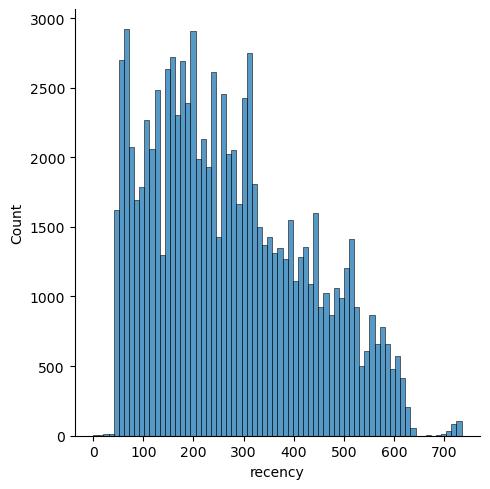

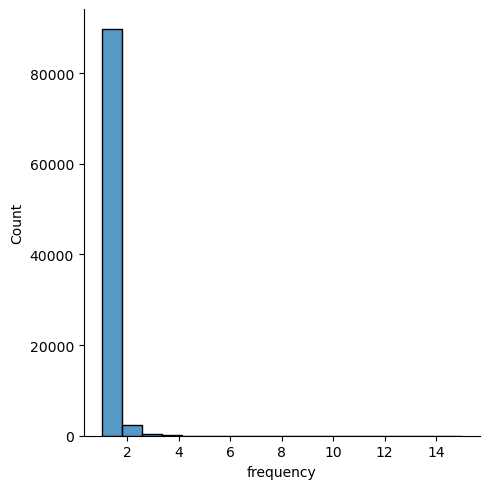

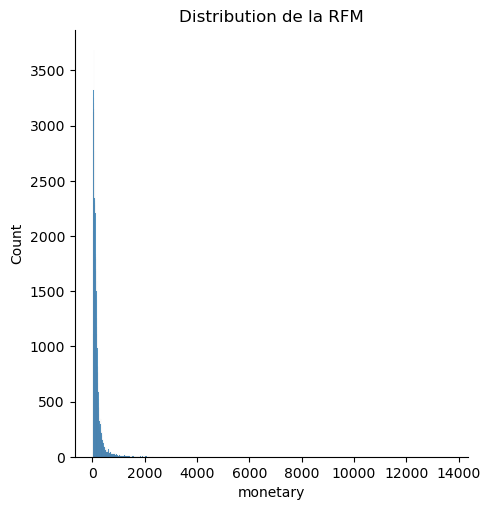

In [104]:
for col in rfm.columns :
    sns.displot(data = rfm, x = col)
plt.title('Distribution de la RFM')
plt.show()

On constate une énorme majorité de clients uniques.

In [105]:
rfm.loc[rfm['frequency'] == 1]

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,153.0,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,159.0,1,27.19
0000f46a3911fa3c0805444483337064,559.0,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,349.0,1,43.62
0004aac84e0df4da2b147fca70cf8255,323.0,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,468.0,1,2067.42
fffea47cd6d3cc0a88bd621562a9d061,280.0,1,84.58
ffff371b4d645b6ecea244b27531430a,602.0,1,112.46


89 648 clients à une seule commande

Regardons les distributions sans ces clients.

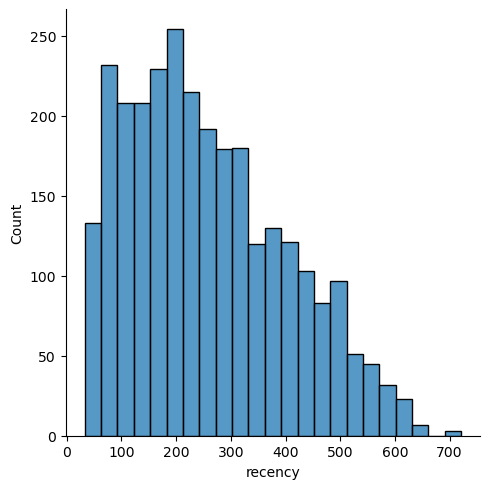

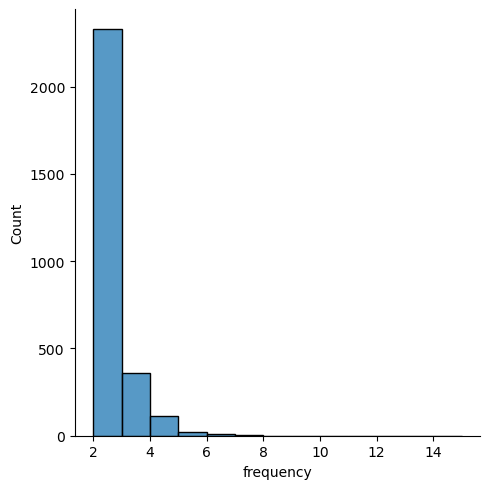

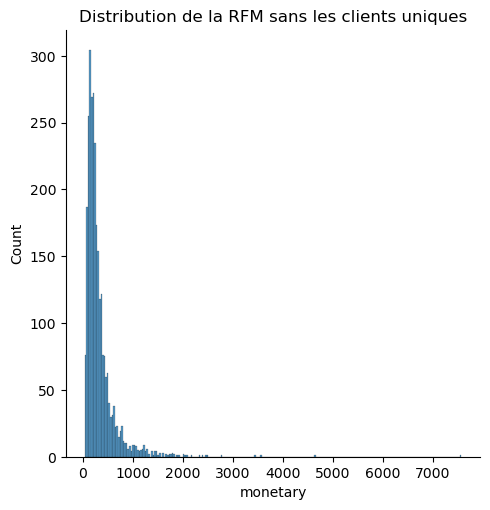

In [106]:
for col in rfm.columns :
    sns.displot(data = rfm.loc[rfm['frequency'] > 1], x = col)
plt.title('Distribution de la RFM sans les clients uniques')
plt.show()

On constate que la grande majorité des clients effectue des achats pour un montant total inférieur à 500 

Les achats ont surtout été effectué dans les 300 derniers jours.

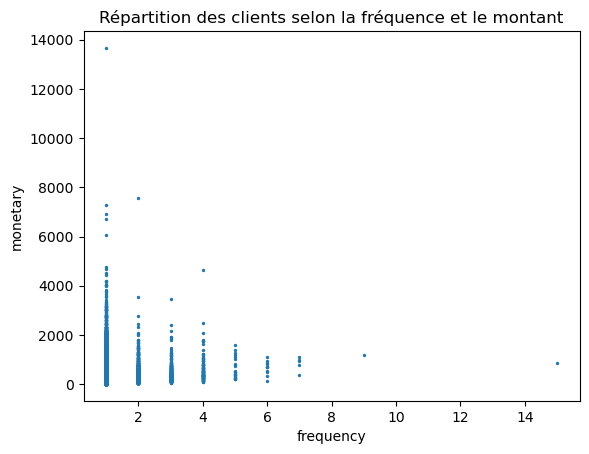

In [107]:
plt.scatter(data['frequency'], data['monetary'], s = 2)
plt.xlabel('frequency')
plt.ylabel('monetary')
plt.title('Répartition des clients selon la fréquence et le montant')
plt.show()

Je vois quelques valeurs extrêmes

In [110]:
data.head()

,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,frequency,days_late,recency,number_of_items,price,freight_value,payment_installments,monetary,review_score
customer_unique_id,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,-23.335331,-46.828647,1,-5.0,153.0,1,129.90,12.00,8,141.90,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,-23.567395,-46.792957,1,-5.0,159.0,1,18.90,8.29,1,27.19,4.0
0000f46a3911fa3c0805444483337064,88115,sao jose,SC,-27.543787,-48.625680,1,-2.0,559.0,1,69.00,17.22,8,86.22,3.0
0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,-1.311011,-48.482884,1,-12.0,349.0,1,25.99,17.63,4,43.62,4.0
0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,-23.504368,-47.466156,1,-8.0,323.0,1,180.00,16.89,6,196.89,5.0


In [108]:
data.isna().mean()

customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
geolocation_lat             0.0
geolocation_lng             0.0
frequency                   0.0
days_late                   0.0
recency                     0.0
number_of_items             0.0
price                       0.0
freight_value               0.0
payment_installments        0.0
monetary                    0.0
review_score                0.0
dtype: float64

In [109]:
data.to_csv('data_filtre.csv',index=False)